# Pseudo-Riemannian manifolds in SageMath
## The Schwarzschild spacetime example

This notebook demonstrates some SageMath tools for pseudo-Riemannian geometry, developed through the [SageManifolds project](https://sagemanifolds.obspm.fr/), by these [authors](https://sagemanifolds.obspm.fr/authors.html). 

This notebook requires a version of SageMath at least equal to 9.0:

In [1]:
version()

'SageMath version 9.2, Release Date: 2020-10-24'

First we set up the notebook to display outputs via LaTeX rendering:

In [2]:
%display latex 

Since some computations are quite heavy, we ask for running them in parallel on 8 
threads:

In [3]:
Parallelism().set(nproc=8)

We introduce the **Schwarzschild spacetime**, which is the spacetime of a **static black hole** in general relativity, as a **4-dimensional Lorentzian manifold** $M$:

In [4]:
M = Manifold(4, 'M', structure='Lorentzian')
M

4-dimensional Lorentzian manifold M

In [5]:
print(M)

4-dimensional Lorentzian manifold M


$M$ is in the category of smooth manifolds over the real field:

In [6]:
M.category()

Category of smooth manifolds over Real Field with 53 bits of precision

In [7]:
M.base_field()

Real Field with 53 bits of precision

At the moment, the real field is modeled by 53-bit floating-point approximations, but this plays no role in the manifold implementation:

In [8]:
print(M.base_field())

Real Field with 53 bits of precision


## Coordinate charts

The function `Manifold` generates a manifold with no-predefined coordinate chart, so that the manifold (user) atlas is empty:

In [9]:
M.atlas()

[]

We introduce the standard **Schwarzchild-Droste coordinates** $(t,r,\theta,\phi)$ on $M$, via the method `chart`:

In [10]:
SD.<t, r, th, ph> = M.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi:periodic")

Note that the argument of `chart()` is a raw string (hence the prefix `r` in front of it), which defines the range of each coordinate, if different from $(-\infty, +\infty)$, as well as its LaTeX symbol, if different from the Python symbol to denote the coordinate. The Python variables for each coordinate are declared within the `<...>` operator on the left-hand side, `SD` denoting the Python variable chosen for the coordinate chart.

In [11]:
SD

Chart (M, (t, r, th, ph))

In [12]:
print(SD)

Chart (M, (t, r, th, ph))


In [13]:
SD.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

Thanks to the SageMath operator `<...>` used in the chart declaration, the coordinates are immediately available:

In [14]:
th

th

They are SageMath's symbolic expressions:

In [15]:
th.parent()

Symbolic Ring

They are also accessible as items of the chart:

In [16]:
SD[0], SD[3]

(t, ph)

In [17]:
SD[:]

(t, r, th, ph)

The manifold (user) atlas is no longer empty: 

In [18]:
M.atlas()

[Chart (M, (t, r, th, ph))]

Let us introduce a second chart on the manifold, that of **Eddington-Finkelstein coordinates**  $(T,r,\theta,\phi)$:

In [19]:
EF.<T, r, th, ph> = M.chart(r"T r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi:periodic")
EF

Chart (M, (T, r, th, ph))

The transition map from Schwarzschild-Droste coordinates (chart `SD`) to Eddington-Finkelstein ones (chart `EF`) depends on a parameter $m$, the mass of the Schwarzschild black hole:

In [20]:
m = var('m')
assume(m > 0)

We provide the explicit coordinate transformation via the method `transition_map`:

In [21]:
SD_to_EF = SD.transition_map(EF, [t +2*m*ln(abs(r/(2*m)-1)), r, th, ph])
SD_to_EF.display()

T = 2*m*log(abs(1/2*r/m - 1)) + t
r = r
th = th
ph = ph

In [22]:
SD_to_EF.inverse().display()

t = 2*m*log(2) + 2*m*log(m) - 2*m*log(abs(-2*m + r)) + T
r = r
th = th
ph = ph

There are now two charts in the manifold atlas:

In [23]:
M.atlas()

[Chart (M, (t, r, th, ph)), Chart (M, (T, r, th, ph))]

One of them is the so-called *default chart*: it is the chart used by any function that requires a chart as argument and none is provided by the user. At this stage, the default chart is the first chart defined on the manifold, but this can be changed by the manifold method `set_default_chart`. 

In [24]:
M.default_chart()

Chart (M, (t, r, th, ph))

One can plot the `SD` chart in terms of `EF` one:

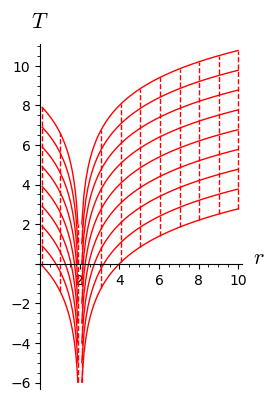

In [25]:
plot1 = SD.plot(EF, ranges={t:(0, 8), r:(2.1, 10)}, fixed_coords={th:pi/2, ph:0}, 
                ambient_coords=(r,T), style={t:'--', r:'-'}, parameters={m: 1}) \
        + SD.plot(EF, ranges={t:(0, 8), r:(0.1, 1.9)}, fixed_coords={th:pi/2, ph:0}, 
                  ambient_coords=(r,T), number_values={t: 9, r: 3},
                  style={t:'--', r:'-'}, parameters={m: 1})
plot1

## Manifold points

To create a point on $M$, we use SageMath's *parent/element* syntax, i.e. the call operator `M(...)` acting on the parent `M`, with the point's coordinates in some chart as argument: 

In [26]:
p = M((m, 8*m, pi/2, 0), name='p')
print(p)

Point p on the 4-dimensional Lorentzian manifold M


Since the chart has not been specified, the default chart (i.e. `SD`) is meant:

In [27]:
SD(p)

(m, 8*m, 1/2*pi, 0)

Thanks to the transition map declared above, the coordinates of $p$ in the Eddington-Finkelstein chart can computed:

In [28]:
EF(p)

(m*(2*log(3) + 1), 8*m, 1/2*pi, 0)

Manifold points have a `plot` method:

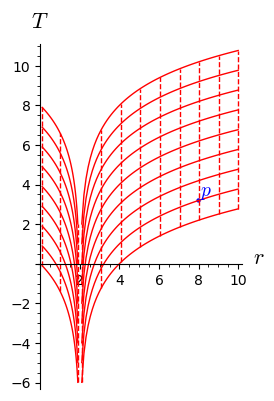

In [29]:
plot1 += p.plot(EF, color='blue', ambient_coords=(r,T), 
                parameters={m: 1}, label_offset=0.4, fontsize=14)
plot1

## Vector fields

When a chart is declared, the manifold is automatically endowed with some vector fields, those of the **coordinate vector frame**:

In [30]:
SD.frame()

Coordinate frame (M, (d/dt,d/dr,d/dth,d/dph))

In [31]:
EF.frame()

Coordinate frame (M, (d/dT,d/dr,d/dth,d/dph))

In [32]:
M.frames()

[Coordinate frame (M, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (M, (d/dT,d/dr,d/dth,d/dph))]

As for charts, there is a *default frame*, i.e. a vector frame that is used by default in functions having a vector frame in their arguments. The default frame can be changed by the method `set_default_frame`.

In [33]:
M.default_frame()

Coordinate frame (M, (d/dt,d/dr,d/dth,d/dph))

The first vector of the Schwarzschild-Droste coordinate frame:

In [34]:
vt = SD.frame()[0]
vt

Vector field d/dt on the 4-dimensional Lorentzian manifold M

In [35]:
vt.display()

d/dt = d/dt

In [36]:
vt.display(EF.frame())

d/dt = d/dT

The second vector of the Schwarzschild-Droste coordinate frame:

In [37]:
vr = SD.frame()[1]
vr

Vector field d/dr on the 4-dimensional Lorentzian manifold M

In [38]:
vr.display(EF.frame())

d/dr = -2*m/(2*m - r) d/dT + d/dr

Creating a vector field from scratch, by providing its components with rest to a given vector frame:

In [39]:
k = M.vector_field(1, -1, 0, 0, frame=EF.frame(), name='k')
k.display()

k = -r/(2*m - r) d/dt - d/dr

In [40]:
k.display(EF.frame())

k = d/dT - d/dr

Plot with respect to Schwarzschild-Droste coordinates (default chart):

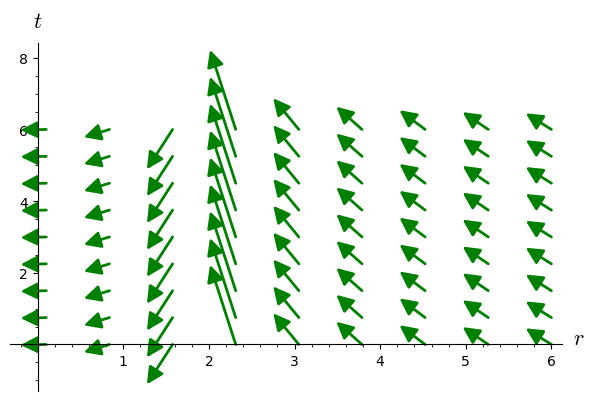

In [41]:
k.plot(ambient_coords=(r,t), fixed_coords={th: pi/2, ph: 0}, 
       ranges={t: (0, 6), r: (0.1, 6)}, number_values=9,
       parameters={m: 1}, color='green', scale=0.3)

Plot with respect to Eddington-Finkelstein coordinates:

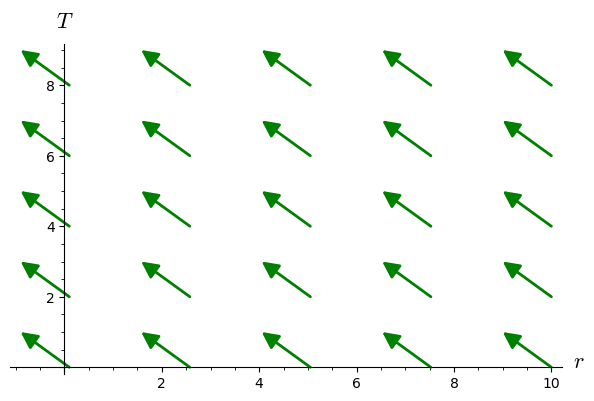

In [42]:
k.plot(chart=EF, ambient_coords=(r,T), chart_domain=EF,
       fixed_coords={th: pi/2, ph: 0}, ranges={T: (0, 8), r: (0.1, 10)}, 
       number_values=5, parameters={m: 1}, color='green')

### Vector fields as sections of the tangent bundle

In [43]:
TM = M.tangent_bundle()
print(TM)

Tangent bundle TM over the 4-dimensional Lorentzian manifold M


In [44]:
k1 = TM.section({EF.frame(): [1, -1, 0, 0]})
print(k1)

Vector field on the 4-dimensional Lorentzian manifold M


In [45]:
k1 == k

True

### The set of all vector fields on $M$ as a $C^\infty(M)$-module:

In [46]:
XM = M.vector_field_module()
print(XM)
XM

Free module X(M) of vector fields on the 4-dimensional Lorentzian manifold M


Free module X(M) of vector fields on the 4-dimensional Lorentzian manifold M

In [47]:
XM.base_ring()

Algebra of differentiable scalar fields on the 4-dimensional Lorentzian manifold M

In [48]:
print(XM.base_ring())

Algebra of differentiable scalar fields on the 4-dimensional Lorentzian manifold M


In [49]:
XM.base_ring().an_element().display()

M --> R
(t, r, th, ph) |--> 2
(T, r, th, ph) |--> 2

### Vectors at a point

The value of a vector field, and more generally of any tensor field, at a given point is obtained by the method `at`: 

In [50]:
kp = k.at(p)
print(kp)

Tangent vector k at Point p on the 4-dimensional Lorentzian manifold M


In [51]:
kp.display()

k = 4/3 d/dt - d/dr

The parent of `kp` is the tangent space at `p`:

In [52]:
kp.parent()

Tangent space at Point p on the 4-dimensional Lorentzian manifold M

In [53]:
print(kp.parent())

Tangent space at Point p on the 4-dimensional Lorentzian manifold M


It is accessible from the manifold via the method `tangent_space`:

In [54]:
kp.parent() is M.tangent_space(p)

True

$T_p M$ is the fiber over $p$ in the tangent bundle $TM$:

In [55]:
kp.parent() is TM.fiber(p)

True

Tangent vectors have a method `plot`:

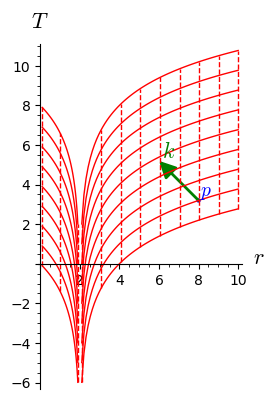

In [56]:
plot1 += kp.plot(EF, color='green', ambient_coords=(r,T), 
                 parameters={m: 1}, scale=2, label_offset=0.5, 
                 fontsize=16)
plot1

### Vector field defined on an open subset

Let us introduce the exterior $E$ of the black hole as an open subset of $M$:

In [57]:
E = M.open_subset('E', coord_def = {SD: r>2*m})

In [58]:
SD.restrict(E).coord_range()

t: (-oo, +oo); r: (2*m, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

In [59]:
p in E

True

In [60]:
u = E.vector_field(name='u')
u[0] = 1/sqrt(1-2*m/r)
u.display()

u = 1/sqrt(-2*m/r + 1) d/dt

In [61]:
SD_to_EF.restrict(E)

Change of coordinates from Chart (E, (t, r, th, ph)) to Chart (E, (T, r, th, ph))

In [62]:
E.atlas()

[Chart (E, (t, r, th, ph)), Chart (E, (T, r, th, ph))]

In [63]:
u.display(EF.frame().restrict(E))

u = 1/sqrt(-2*m/r + 1) d/dT

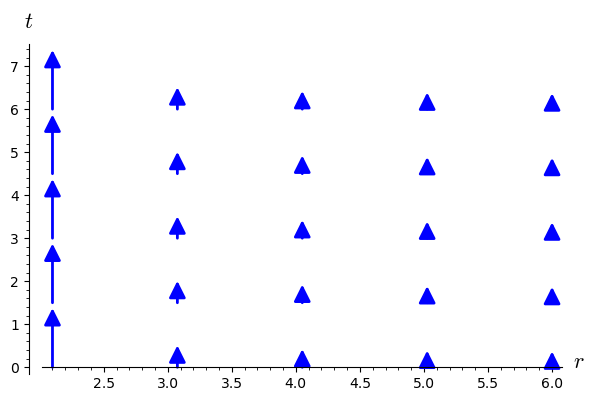

In [64]:
u.plot(ambient_coords=(r, t), fixed_coords={th: pi/2, ph: 0}, 
       ranges={t: (0, 6), r: (2.1, 6)}, number_values=5, 
       parameters={m: 1}, scale=0.3)

In [65]:
u.at(p).display()

u = 2/3*sqrt(3) d/dt

## Metric tensor

We define next the **metric tensor** $g$ from its non-vanishing components in the manifold's default frame, namely the coordinate frame associated to Schwarzschild-Droste coordinate:

In [66]:
g = M.metric()
g[0, 0] = - (1 - 2*m/r)
g[1, 1] = 1/(1 - 2*m/r)
g[2, 2] = r^2
g[3, 3] = r^2*sin(th)^2

In [67]:
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [68]:
SD.coframe()

Coordinate coframe (M, (dt,dr,dth,dph))

In [69]:
g[:]

[     2*m/r - 1              0              0              0]
[             0 -1/(2*m/r - 1)              0              0]
[             0              0            r^2              0]
[             0              0              0  r^2*sin(th)^2]

In [70]:
g[1,1]

-1/(2*m/r - 1)

$g_{rr}$ is diverging at $r=2m$: this is a singularity of the Schwarszchild-Droste coordinates.

In [71]:
g.display_comp()

g_t,t = 2*m/r - 1 
g_r,r = -1/(2*m/r - 1) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

The components of $g$ with respect to the Eddington-Finkelstein frame are evaluated via the methods `comp` or `display`:

In [72]:
g.display(EF.frame())

g = (2*m/r - 1) dT*dT + 2*m/r dT*dr + 2*m/r dr*dT + (2*m + r)/r dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [73]:
g[EF.frame(),:]

[    2*m/r - 1         2*m/r             0             0]
[        2*m/r   (2*m + r)/r             0             0]
[            0             0           r^2             0]
[            0             0             0 r^2*sin(th)^2]

Note that these components are regular at $r=2m$, contrary to the components in Schwarzschild-Droste coordinates.

The metric tensor is a twice-covariant tensor (actually a field of symmetric bilinear forms):

In [74]:
g.tensor_type()

(0, 2)

It can be thus be applied to a pair of vector fields, for instance $u$ and $k$:

In [75]:
s = g(u, k)
s

Scalar field g(u,k) on the Open subset E of the 4-dimensional Lorentzian manifold M

In [76]:
print(s)

Scalar field g(u,k) on the Open subset E of the 4-dimensional Lorentzian manifold M


In [77]:
s.display()

g(u,k): E --> R
   (t, r, th, ph) |--> -sqrt(r)/sqrt(-2*m + r)

In [78]:
s.expr()

-sqrt(r)/sqrt(-2*m + r)

In [79]:
g(k, k).display()

g(k,k): M --> R
   (t, r, th, ph) |--> 0
   (T, r, th, ph) |--> 0

$u$ is a unit timelike vector:

In [80]:
g(u, u).display()

g(u,u): E --> R
   (t, r, th, ph) |--> -1

Scalar products returned by the method `dot` are actually those formed with $g$:

In [81]:
u.dot(u)

Scalar field u.u on the Open subset E of the 4-dimensional Lorentzian manifold M

In [82]:
u.dot(u).display()

u.u: E --> R
   (t, r, th, ph) |--> -1

## Levi-Civita connection

In [83]:
nabla = g.connection()
print(nabla)

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional Lorentzian manifold M


In [84]:
nabla.display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^t_r,t = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_th,r = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th) 
Gam^ph_ph,r = 1/r 
Gam^ph_ph,th = cos(th)/sin(th)

In [85]:
Parallelism().set(nproc=1)

In [86]:
Dk = nabla(k)
Dk

Tensor field nabla_g(k) of type (1,1) on the 4-dimensional Lorentzian manifold M

In [87]:
print(Dk)

Tensor field nabla_g(k) of type (1,1) on the 4-dimensional Lorentzian manifold M


In [88]:
Dk.display()

nabla_g(k) = m/(2*m*r - r^2) d/dt*dt - m/(4*m^2 - 4*m*r + r^2) d/dt*dr + m/r^2 d/dr*dt - m/(2*m*r - r^2) d/dr*dr - 1/r d/dth*dth - 1/r d/dph*dph

In [89]:
Dk.display_comp()

nabla_g(k)^t_t = m/(2*m*r - r^2) 
nabla_g(k)^t_r = -m/(4*m^2 - 4*m*r + r^2) 
nabla_g(k)^r_t = m/r^2 
nabla_g(k)^r_r = -m/(2*m*r - r^2) 
nabla_g(k)^th_th = -1/r 
nabla_g(k)^ph_ph = -1/r

The acceleration $\nabla_k k$ of the vector field $k$:

In [90]:
Ak = Dk.contract(k)
print(Ak)

Vector field on the 4-dimensional Lorentzian manifold M


In [91]:
Ak.display()

0

$k$ is thus geodesic vector. The field lines of $k$ are actually the ingoing radial null geodesics of Schwarzschild spacetime.

Instead of the method contract, one can use index notations to compute $\nabla_k k$ as $k^b \nabla_b k^a$:

In [92]:
Ak == Dk['^a_b']*k['^b']

True

In [93]:
Parallelism().set(nproc=8)

The acceleration $\nabla_u u$ of the vector field $u$:

In [94]:
Au = nabla(u).contract(u)
Au.display()

m/r^2 d/dr

$\nabla g$ is identically zero, since the connection $\nabla$ is compatible with $g$:

In [95]:
Dg = nabla(g)
print(Dg)

Tensor field nabla_g(g) of type (0,3) on the 4-dimensional Lorentzian manifold M


In [96]:
Dg.display()

nabla_g(g) = 0

## Curvature

The **Riemann curvature tensor** is computed as

In [97]:
Riem = g.riemann()
print(Riem)

Tensor field Riem(g) of type (1,3) on the 4-dimensional Lorentzian manifold M


In [98]:
Riem.display_comp(only_nonredundant=True)

Riem(g)^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
Riem(g)^t_th,t,th = -m/r 
Riem(g)^t_ph,t,ph = -m*sin(th)^2/r 
Riem(g)^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^th_t,t,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_r,r,th = -m/(2*m*r^2 - r^3) 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^ph_t,t,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
Riem(g)^ph_th,th,ph = -2*m/r

The component $\mathrm{Riem}(g)^t_{\ \, rtr} = \mathrm{Riem}(g)^0_{\ \, 101}$ is returned by 

In [99]:
Riem[0,1,0,1]

-2*m/(2*m*r^2 - r^3)

In [100]:
Riem.display_comp(EF.frame(), only_nonredundant=True)

Riem(g)^T_T,T,r = 4*m^2/r^4 
Riem(g)^T_r,T,r = 2*(2*m^2 + m*r)/r^4 
Riem(g)^T_th,T,th = -m/r 
Riem(g)^T_ph,T,ph = -m*sin(th)^2/r 
Riem(g)^r_T,T,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_r,T,r = -4*m^2/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^th_T,T,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_T,r,th = 2*m^2/r^4 
Riem(g)^th_r,T,th = 2*m^2/r^4 
Riem(g)^th_r,r,th = (2*m^2 + m*r)/r^4 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^ph_T,T,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_T,r,ph = 2*m^2/r^4 
Riem(g)^ph_r,T,ph = 2*m^2/r^4 
Riem(g)^ph_r,r,ph = (2*m^2 + m*r)/r^4 
Riem(g)^ph_th,th,ph = -2*m/r

The **Kretschmann scalar** is the "square" of the Riemann tensor defined by 
$$K = R_{abcd} \, R^{abcd}, \qquad R := \mathrm{Riem}(g)$$
To compute it, we must first form the tensor fields whose components are $R_{abcd}$ and 
$R^{abcd}$. They are obtained by respectively lowering and raising the indices of the components $R^a_{\ \, bcd}$ of the Riemann tensor, via the metric $g$. These two operations are performed by the methods `down()` and `up()`. The contraction is performed by summation on repeated indices, using LaTeX notations:

In [101]:
K = Riem.down(g)['_{abcd}'] * Riem.up(g)['^{abcd}']
print(K)
K.display()

Scalar field on the 4-dimensional Lorentzian manifold M


M --> R
(t, r, th, ph) |--> 48*m^2/r^6
(T, r, th, ph) |--> 48*m^2/r^6

In [102]:
K.expr()

48*m^2/r^6

Since $\lim_{r\to 0} K = +\infty$, we may say that $r=0$ is a **curvature singularity** of Schwarzschild spacetime.

### Ricci tensor

In [103]:
Ric = g.ricci()
print(Ric)

Field of symmetric bilinear forms Ric(g) on the 4-dimensional Lorentzian manifold M


We check that the Schwarzschild metric is a solution of the vacuum **Einstein equation**:

In [104]:
Ric.display()

Ric(g) = 0

## Geodesics

First, for graphical purposes, we introduce the **Euclidean space** $\mathbb{E}^3$ and some map $M\to \mathbb{E}^3$:

In [105]:
E3.<x,y,z> = EuclideanSpace()
X3 = E3.cartesian_coordinates()
to_E3 = M.diff_map(E3, {(SD, X3): 
                        [r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)]})
to_E3.display()

M --> E^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))
   (T, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

## A timelike geodesic

Let us consider the geodesic starting at point $p$ and having the following tangent vector at $p$ (note that the tangent vector $v_0$ is constructed by means of the call operator `()` acting of the parent, which is the tangent space to $M$ at $p$): 

In [106]:
v0 = M.tangent_space(p)((1.3, 0, 0, 0.064/m), name='v_0')
v0.display()

v_0 = 1.30000000000000 d/dt + 0.0640000000000000/m d/dph

We declare the geodesic with such initial conditions, denoting by $s$ the affine parameter (proper time), with $(s_{\rm min}, s_{\rm max})=(0, 1500\,m)$:

In [107]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 2000), v0)
geod

Integrated geodesic in the 4-dimensional Lorentzian manifold M

Note that the initial point `p` is not explicitely passed in the argument list of `integrated_geodesic`, because this piece of information is contained in `v0`:

In [108]:
p is v0.parent().base_point()

True

In [109]:
sol = geod.solve(parameters_values={m: 1})  # numerical integration
interp = geod.interpolate()                 # interpolation of the solution for the plot

In [110]:
geod.plot_integrated(chart=X3, mapping=to_E3, plot_points=1000, 
                     thickness=2, label_axes=False) \
+ p.plot(chart=X3, mapping=to_E3, size=4, parameters={m: 1}) \
+ sphere(size=2, color='grey')

Graphics3d Object

A 2D view by suppressing $z$ from the ambient coordinates:

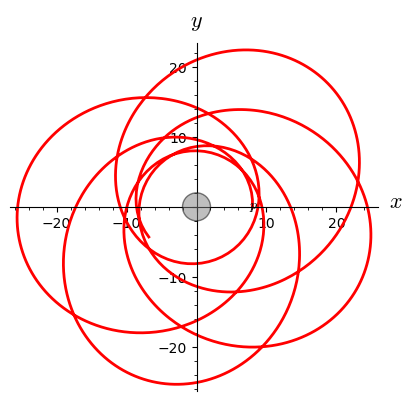

In [111]:
bh_plot = circle((0, 0), 2, edgecolor='black', fill=True, facecolor='grey', alpha=0.5)
geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), plot_points=1000, 
                     thickness=2) \
+ p.plot(chart=X3, mapping=to_E3, ambient_coords=(x,y), size=4, parameters={m: 1}) \
+ bh_plot

## Null geodesics

Let us consider a null geodesique $\mathscr{L}$ in the equatorial plane ($\theta = \pi/2$). 
The null vector $v$ tangent to $\mathscr{L}$ and associated to some affine parameter $\lambda$ is given by the following first integrals of the geodesic equation:
$$
    v^t = \frac{\mathrm{d}t}{\mathrm{d}\lambda} =  \left(1 - \frac{2m}{r} \right)^{-1}
$$
$$
    v^r = \frac{\mathrm{d}r}{\mathrm{d}\lambda} = \pm \sqrt{1 - \frac{b^2}{r^2} \left(1 - \frac{2m}{r} \right) }
$$
$$
    v^\theta = \frac{\mathrm{d}\theta}{\mathrm{d}\lambda} = 0
$$
$$
    v^\varphi = \frac{\mathrm{d}\varphi}{\mathrm{d}\lambda} = \frac{b}{r^2}
$$
where the constant $b$ is related to the conserved energy $E$ and conserved angular momentum $L$ along the geodesic by 
$$
    b = \frac{L}{E} . 
$$
For a geodesic arising from infinity, $b$ is the **impact parameter**.

To set up the initial vector for the computation of a null geodesic, let us define a function that takes $b$ and some initial radius $r_0$ as input and returns the initial vector $v_0$. We take advantage that SageMath is built atop Python to construct this function as a pure Python function:

In [112]:
def initial_vector(r0, b, phi0=0, inward=True):
    r"""
    Evaluate the initial tangent vector along a null geodesic. 
    
    INPUT:
    
    - r0: radial SD coordinate of the initial point
    - b: impact parameter
    - phi0: azimuthal SD coordinate of the initial point (default: 0)
    - inward: determines whether the geodesic has initially v^r < 0 (default: True)
    
    """
    vt0 = 1/(1 - 2*m/r0)
    vr0 = sqrt(1 - b^2/r0^2*(1 - 2*m/r0))
    if inward:
        vr0 = - vr0
    vth0 = 0
    vph0 = b / r0^2
    p0 = M((0, r0, pi/2, phi0), name='p_0')  # initial point
    return M.tangent_space(p0)((vt0, vr0, vth0, vph0), name='v_0')

Let us use this function to construct the initial vector for $r_0 = 10m$ and $b=7m$:

In [113]:
v0 = initial_vector(10*m, 7*m)
v0.display()

v_0 = 5/4 d/dt - 2/5*sqrt(19/5) d/dr + 7/100/m d/dph

Let us check that $v_0$ is a null vector:

In [114]:
p0 = v0.parent().base_point()
g.at(p0)(v0, v0)

0

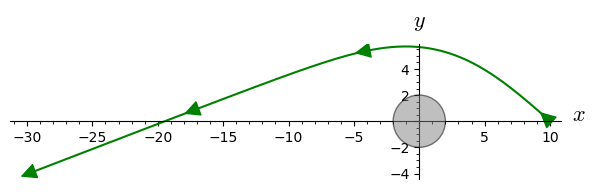

In [115]:
geod = M.integrated_geodesic(g, (s, 0, 40), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 = geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                             plot_points=500, color='green', thickness=1.5, display_tangent=True, 
                             color_tangent='green', plot_points_tangent=4, scale=1) 
plot2 += bh_plot
plot2

A null geodesic plunging into the black hole:

In [116]:
v0 = initial_vector(10*m, 5*m)
v0.display()

v_0 = 5/4 d/dt - 2*sqrt(1/5) d/dr + 1/20/m d/dph

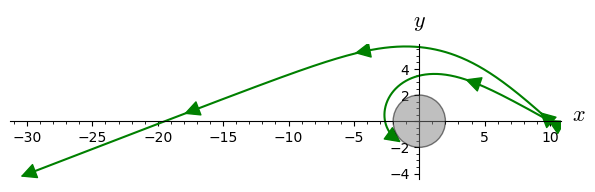

In [117]:
geod = M.integrated_geodesic(g, (s, 0, 13), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 += geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                              plot_points=500, color='green', thickness=1.5, display_tangent=True, 
                              color_tangent='green', plot_points_tangent=3, scale=0.2)
plot2

### The photon orbit

The photon orbit corresponds to $r_0=3m$ with the following critical value of the impact parameter: 
$$
    b_{\rm c} = 3\sqrt{3}\, m
$$

In [118]:
bc = 3*sqrt(3)*m
n(bc/m)

5.19615242270663

In [119]:
v0 = initial_vector(3*m, bc)
v0.display()

v_0 = 3 d/dt + 1/3*sqrt(3)/m d/dph

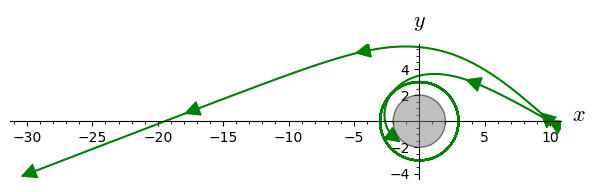

In [120]:
geod = M.integrated_geodesic(g, (s, 0, 100), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 += geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                              plot_points=500, color='green', thickness=1.5)
plot2

A geodesic with $b$ close to $b_{\rm c}$ wraps around the circular orbit:  

In [121]:
v0 = initial_vector(10*m, 5.2025*m)

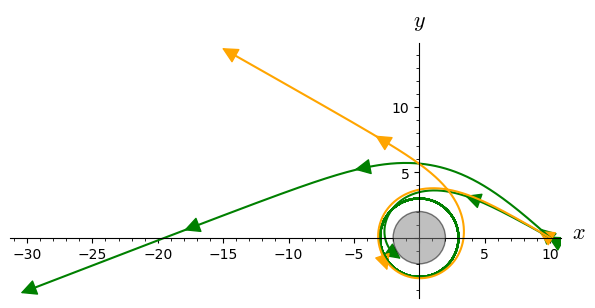

In [122]:
geod = M.integrated_geodesic(g, (s, 0, 40), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 += geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                              plot_points=500, color='orange', thickness=1.5,
                              display_tangent=True, color_tangent='orange', 
                              plot_points_tangent=4, scale=1)
plot2

## Using SymPy as the symbolic backend

By default, the symbolic backend used in tensor calculus is SageMath's one (Pynac + Maxima), implemented via the symbolic ring `SR`. We can choose to use SymPy instead:

In [123]:
M.set_calculus_method('sympy')

In [124]:
v = 2*k

In [125]:
v.display()

2*r/(-2*m + r) d/dt - 2 d/dr

In [126]:
v[0]

2*r/(-2*m + r)

In [127]:
v[0].expr()

2*r/(-2*m + r)

In [128]:
type(v[0].expr())

<class 'sympy.core.mul.Mul'>

In [129]:
M.set_calculus_method('SR')

In [130]:
type(v[0].expr())

<class 'sage.symbolic.expression.Expression'>

# Going further


Visit the [SageManifolds examples](http://sagemanifolds.obspm.fr/examples.html). 